In [3]:
# Special Session: EDA with Matplotlib -
# Last time, humne Pandas se data ko samjha aur Matplotlib se basic plots banana seekha. Aaj, hum in dono powers ko combine karenge aur ek asli Data Analyst ki tarah kaam karenge.
# We will perform Exploratory Data Analysis (EDA).
#  EDA ka matlab hai data ke andar chhupi hui story aur patterns ko dhoondhna.
#  Our goal is not just to make plots,
# but to ask questions and find answers within our data.


In [2]:
# Our Investigation Plan (EDA Steps):
# Setup and Initial Inspection: Apne hathiyaar taiyaar karlo! (Loading data and a quick recap).
# Univariate Analysis: Analyzing one variable at a time. (Har khiladi ko akele akele samjho).
# Analyzing Categorical Variables (Bar Charts).
# Analyzing Numerical Variables (Histograms & Box Plots).
# Bivariate Analysis: Finding relationships between two variables. (Rishton ki khoj).
# Numerical vs. Numerical (Scatter Plot).
# Categorical vs. Numerical (Bar/Box Plots).
# Categorical vs. Categorical (Grouped Bar Chart).
# Conclusion: Summarizing our findings. (Jasoosi ke natije).


In [1]:

# Riwaz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use a good style for our plots
plt.style.use('seaborn-v0_8-whitegrid')

# Load the data and do the basic cleaning we did before
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df['Age'].fillna(df['Age'].mean(), inplace=True)
# We'll drop rows where Embarked is missing, as it's only 2 rows
df.dropna(subset=['Embarked'], inplace=True)

print("Setup Complete. Our DataFrame is ready for investigation.")
display(df.head())

Setup Complete. Our DataFrame is ready for investigation.


/tmp/ipython-input-1-3121261803.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Univariate Analysis (Analyzing Single Variables)
# Let's start by understanding each variable individually.
# A. Categorical Variables: The Group Players
# We'll use bar charts to see the count of each category.


In [6]:
# Question 1: How many people survived vs. did not? (Survived column)
# Generated python


Survived
0    549
1    340
Name: count, dtype: int64


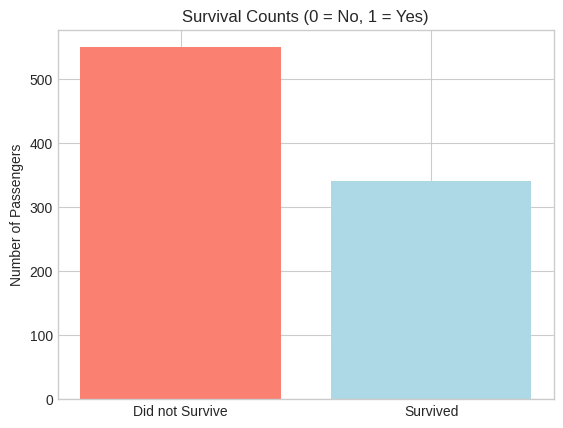

In [4]:
# Get the counts of survived (1) and not survived (0)
survival_counts = df['Survived'].value_counts()
print(survival_counts)

# Let's plot this
fig, ax = plt.subplots()
ax.bar(survival_counts.index, survival_counts.values, color=['salmon', 'lightblue'])

# Customize our plot
ax.set_title('Survival Counts (0 = No, 1 = Yes)')
ax.set_ylabel('Number of Passengers')
ax.set_xticks([0, 1]) # Ensure we only have ticks for 0 and 1
ax.set_xticklabels(['Did not Survive', 'Survived']) # Use meaningful labels

plt.show() # explicitly show the plot

In [ ]:
#  (A large number of people unfortunately did not survive).

In [9]:
# Numerical Variables: The Numbers Game
# We'll use Histograms to see distributions and Box Plots to see spread and outliers.
# Question 2: What is the age distribution of the passengers?


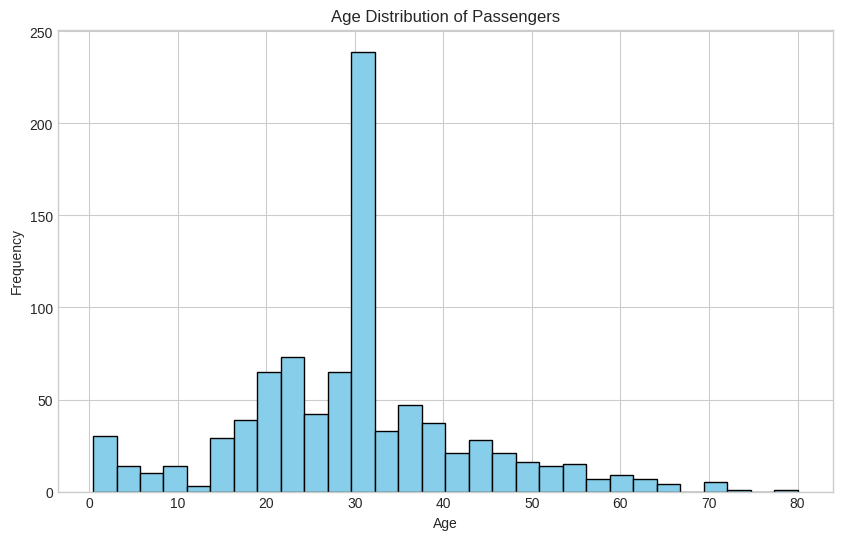

In [7]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')

# Customize
ax.set_title('Age Distribution of Passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.show()

In [ ]:
# The passenger list has many people in the 20-30 age range. There are also a good number of children.

In [10]:
# Question 3: How is the Fare distributed? Are there outliers?
# A histogram might be skewed by a few very high fares. A box plot is perfect for this. Yeh humein outliers (ameer log) dikhayega.


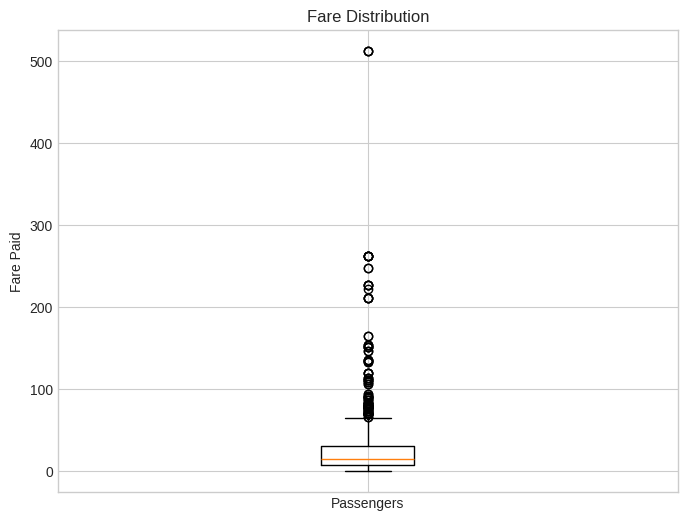

In [12]:

# Let's create a box plot for the 'Fare' column
fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(df['Fare'])

# Customize
ax.set_title('Fare Distribution')
ax.set_ylabel('Fare Paid')
ax.set_xticklabels(['Passengers']) # Give a name to the x-tick

plt.show()



In [13]:

# Finding:  The main box is very small, meaning most people paid a low fare. The dots at the top are outliers—passengers who paid a very high fare.


In [ ]:
# 3. Bivariate Analysis (Analyzing Two Variables)
# Now for the real detective work. Let's find relationships!
# A. Numerical vs. Numerical


In [ ]:
# Question 4: Is there a relationship between Age and Fare?


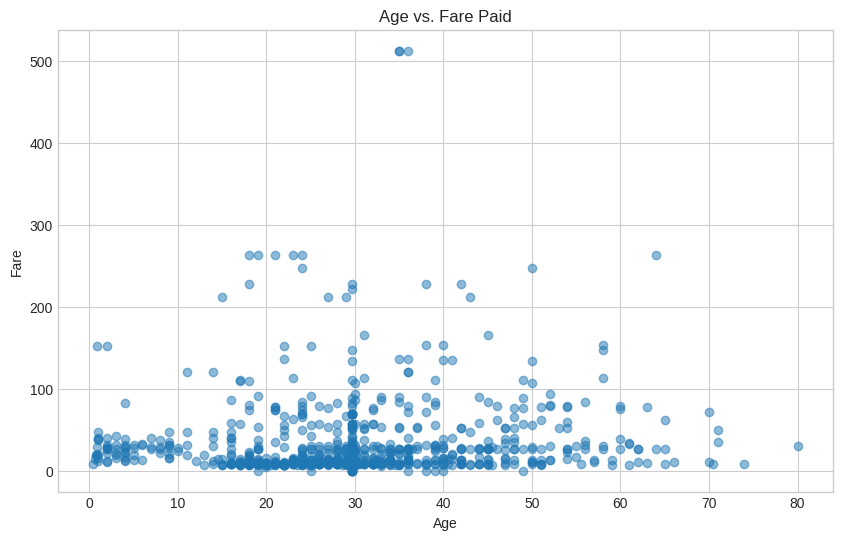

In [14]:

# We use a scatter plot for this
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df['Age'], df['Fare'], alpha=0.5)

# Customize
ax.set_title('Age vs. Fare Paid')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.show()

In [15]:
# Finding: There's no strong, clear relationship. People of all ages paid a wide range of fares.
#  However, the most expensive tickets were generally bought by people aged 30-50.

In [16]:
# B. Categorical vs. Numerical


In [17]:
# Question 5: Does the passenger class (Pclass) affect the fare they paid?
# A box plot is excellent for comparing distributions across categories.


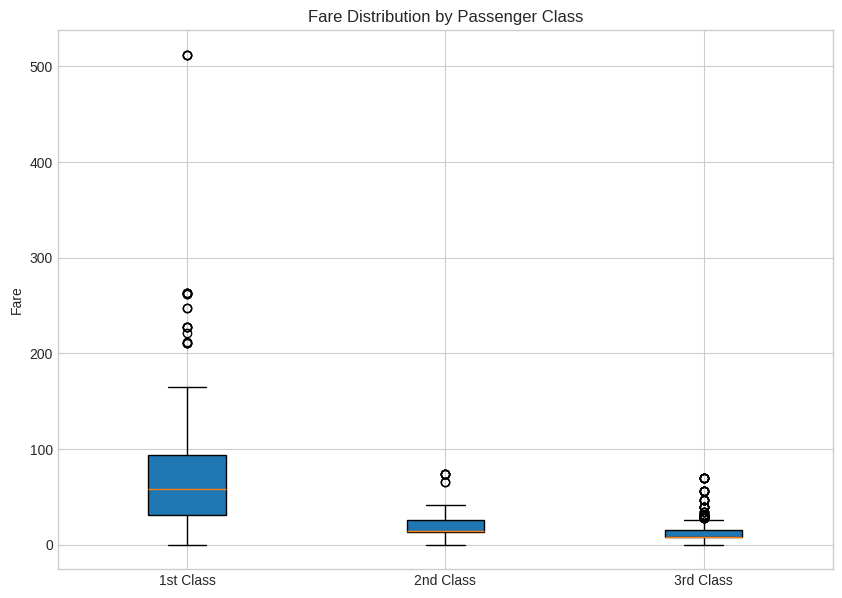

In [18]:

# We'll create a box plot for each Pclass
# Matplotlib requires us to separate the data for each category first
class_1_fare = df[df['Pclass'] == 1]['Fare']
class_2_fare = df[df['Pclass'] == 2]['Fare']
class_3_fare = df[df['Pclass'] == 3]['Fare']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot([class_1_fare, class_2_fare, class_3_fare], patch_artist=True)

# Customize
ax.set_title('Fare Distribution by Passenger Class')
ax.set_ylabel('Fare')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

plt.show()

In [ ]:
# Zameen-aasmaan ka fark hai. 1st Class fares are much higher and more spread out than 2nd and 3rd Class fares.

In [ ]:
# C. Categorical vs. Categorical
# Question 6: What is the survival rate by gender?
# # This requires a bit more work. We need to calculate the survival rate and then plot it.

Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64


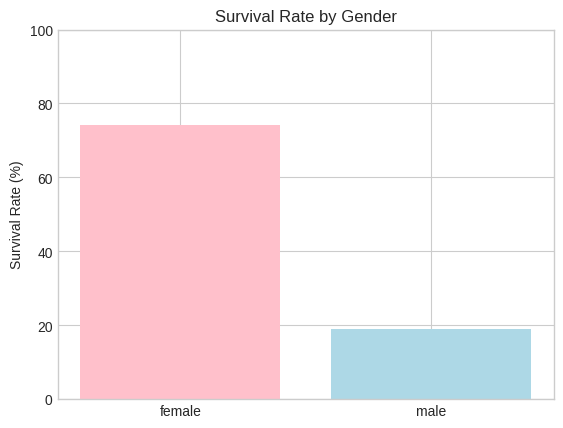

In [19]:
# Use pandas to calculate survival rate by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)

# Now, create a bar chart
fig, ax = plt.subplots()
ax.bar(survival_by_sex.index, survival_by_sex.values, color=['pink', 'lightblue'])

# Customize
ax.set_title('Survival Rate by Gender')
ax.set_ylabel('Survival Rate (%)')
ax.set_ylim(0, 100) # Set y-axis limit to be from 0 to 100

plt.show()

In [ ]:
# Finding: A very strong pattern! Female passengers had a much higher survival rate (around 74%)
# compared to male passengers (around 19%). This is a classic Titanic insight.

In [ ]:
# Advanced Question 7: How does survival relate to Gender WITHIN each Class?
# This is a tougher plot to make in Matplotlib, but it's a great exercise. We need a grouped bar chart.

Sex        female       male
Pclass                      
1       96.739130  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


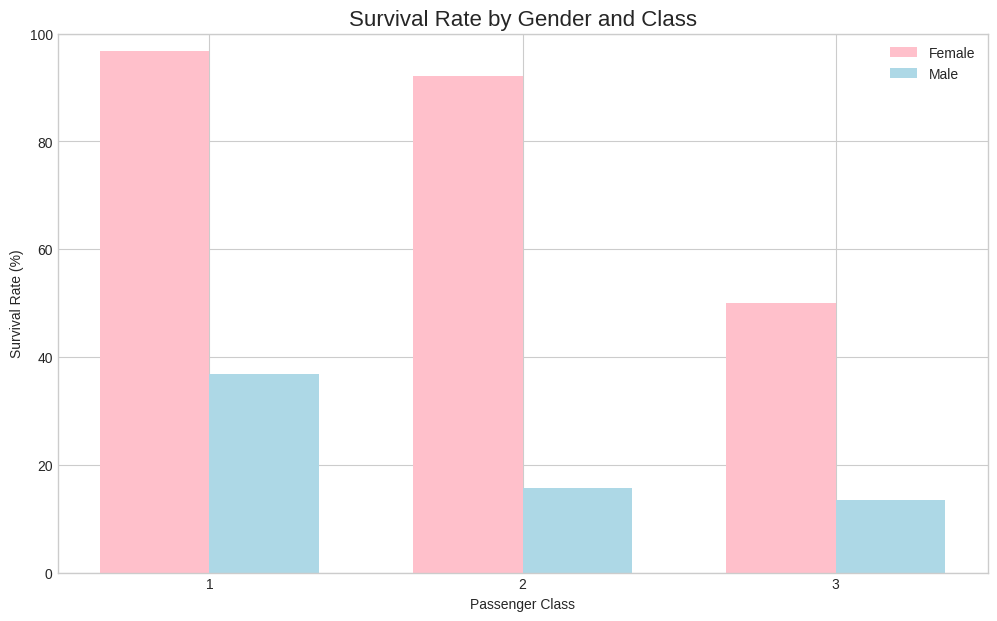

In [20]:
# First, get the data using pandas crosstab. Yeh data ko ready-to-plot format mein laata hai.
survival_by_class_sex = pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean') * 100
print(survival_by_class_sex)

# --- Now for the Matplotlib magic ---
# Set the positions and width for the bars
positions = np.arange(len(survival_by_class_sex.index))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting female bars
female_bars = ax.bar(positions - width/2, survival_by_class_sex['female'], width, label='Female', color='pink')
# Plotting male bars
male_bars = ax.bar(positions + width/2, survival_by_class_sex['male'], width, label='Male', color='lightblue')

# Customizing the plot
ax.set_title('Survival Rate by Gender and Class', fontsize=16)
ax.set_ylabel('Survival Rate (%)')
ax.set_xticks(positions)
ax.set_xticklabels(survival_by_class_sex.index)
ax.set_xlabel('Passenger Class')
ax.legend()
ax.set_ylim(0, 100)

plt.show()

In [21]:
# Finding: This gives us a much deeper story!


# In 1st and 2nd class, females had a very high chance of survival (>90%).
# Even in 3rd class, females had a better survival rate than males from any class.
# Males in 1st class had a better chance than males in 2nd or 3rd class.


**After our detailed EDA using Matplotlib, we've uncovered several key stories from the Titanic dataset:**
Survival was not random: More people perished than survived.

Gender was a major factor: "Women and children first" seems to be true, as females had a drastically higher survival rate.

Class mattered: Higher-class passengers paid more and had a better chance of survival, especially when combined with gender.

Age Distribution: The ship carried a wide range of passengers, with a large number of young adults.



